In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df=sns.load_dataset('titanic')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.head()
df.info()
df.describe()

2. Initial Data Inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


3. Handling Missing Data

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

4.Dealing with Missing Data: fill mising value with median value

In [8]:
df['age'].fillna(df['age'].median(), inplace=True)

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

5.Univariate Analysis

In [ ]:
a.Numerical Features:

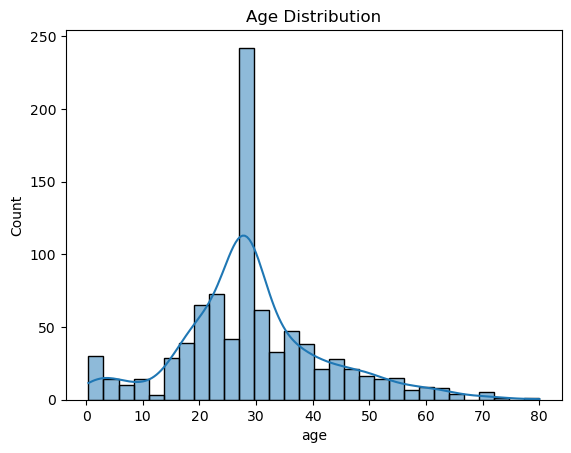

In [11]:
# Distribution of age
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()


In [ ]:
b.Categorical Features:

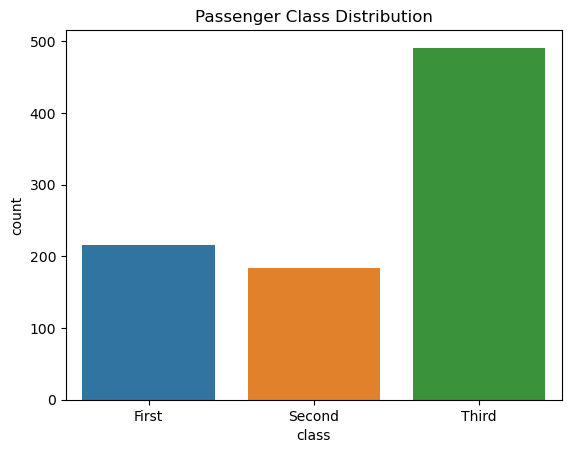

In [12]:
# Count plot of 'class'
sns.countplot(x='class', data=df)
plt.title('Passenger Class Distribution')
plt.show()


c.Outlier Detection:

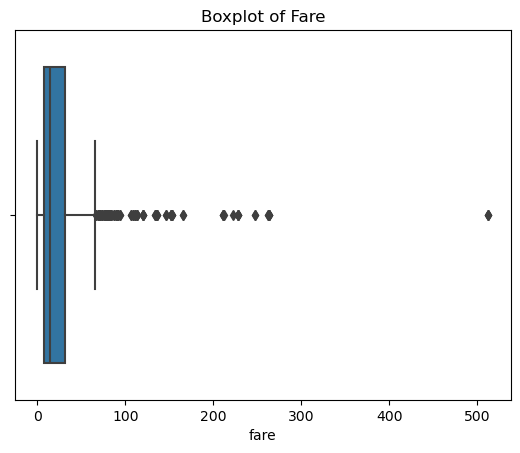

In [13]:
# Boxplot for detecting outliers in 'fare'
sns.boxplot(x=df['fare'])
plt.title('Boxplot of Fare')
plt.show()


In [ ]:
6. Bivariate Analysis

In [ ]:
a.Numerical vs. Numerical:

<Axes: xlabel='age', ylabel='fare'>

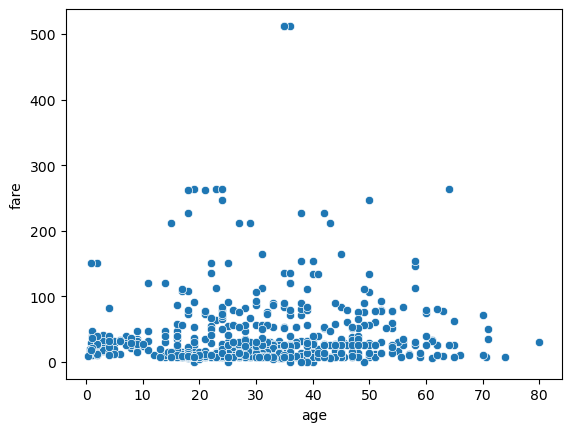

In [2]:
# Scatter plot between 'age' and 'fare'

sns.scatterplot(x = 'age',y='fare',data = df)

In [ ]:
Numerical vs. Categorical:

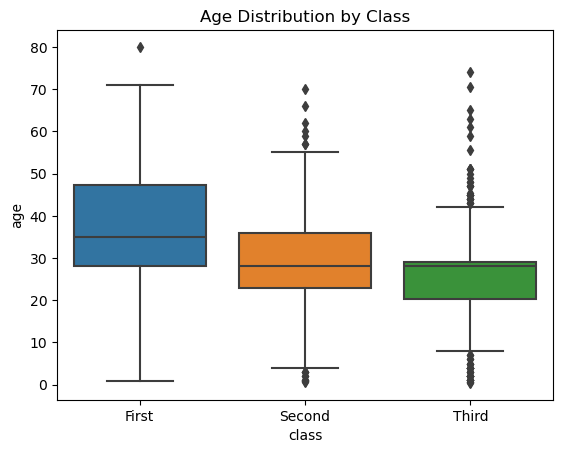

In [15]:
# Boxplot of age across different classes
sns.boxplot(x='class', y='age', data=df)
plt.title('Age Distribution by Class')
plt.show()


In [ ]:
Categorical vs. Categorical:

In [16]:
# Crosstab between 'sex' and 'survived'              
#This method is used to compute a simple cross-tabulation of two (or more) factors.
#By default, computes a frequency table of the factors unless an array of values and 
# an aggregation function are passed.
crosstab = pd.crosstab(df['sex'], df['survived'])
print(crosstab)


survived    0    1
sex               
female     81  233
male      468  109


In [ ]:
7.Multivariate Analysis

In [ ]:
Pair Plots:

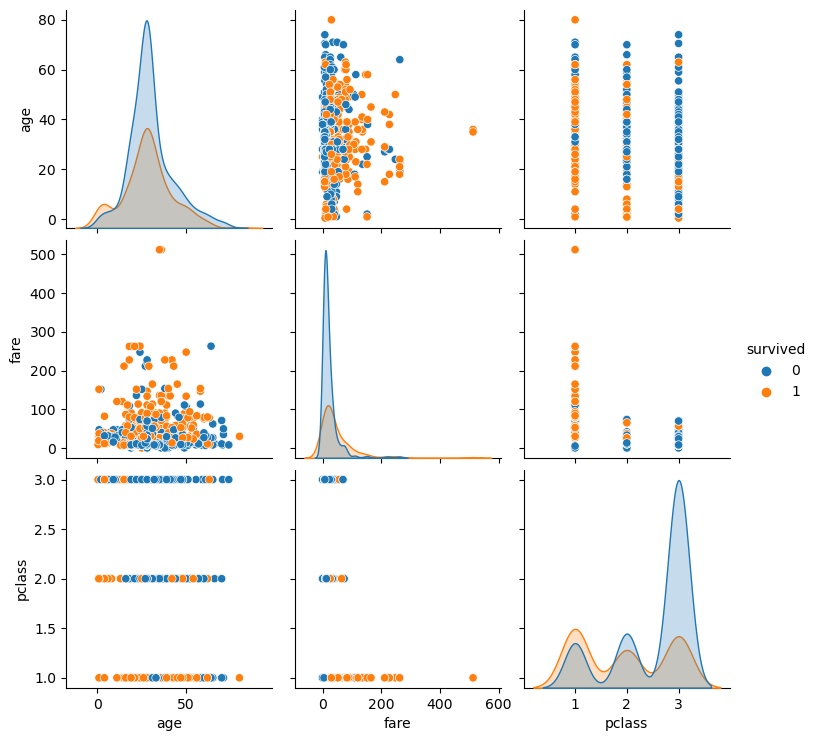

In [17]:
# Pairplot for selected features
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue='survived')
plt.show()


In [ ]:
Heatmaps:

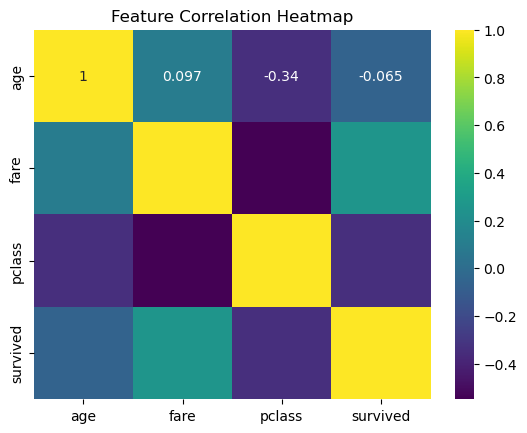

In [18]:
# Heatmap to visualize the correlation of selected features
sns.heatmap(df[['age', 'fare', 'pclass', 'survived']].corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()
